<a href="https://colab.research.google.com/github/anniepeacock/sar_notebooks/blob/devel/SAR_Notebooks/urban_landcover/Land_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAR Application: Land Use (Urban vs. Non-Urban)
## I. How to create SAR quicklook images of land use?
* Useful Products: HH, HV power (backscatter). Polarimetric Synthetic Aperture Radar (PolSAR) products can be useful to map different landcover, particularly in the polarizations HH (horizontal transmit and horizontal receive), HV (horizontal transmit and vertical receive), and if possible VV (vertical transmit and vertical receive).
* Useful Wavelengths: L, S, C, X
* Relevant Sensors: UAVSAR, ALOS, JERS-1, ERS, TandemX
* Qualitative Browse Products: presence of buildings


## II. How to interpret SAR images of land use?
 To view the PolSAR products, Pauli decomposition can be used for quad-pol data, or HH/HV and VV/VH for dual-pol images. In PolSAR images, urban settlements are bright owing to strong double-bounce in areas with buildings. High relative contribution of HH band depends on building orientation with respect to the antenna.


## UAVSAR Urban Land Cover Examples
Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR) is an L-Band airborne radar instrument mounted on NASA's C-20A research aircraft. The overlay of different polarization channels allows users to visually classify a scene by its backscattering mechanism, such as surface scattering (strong HH and VV return), volume scattering (strong HV return) and double-bounce scattering (strong HH return). Thus in RGB images, areas dominated by green (HV) intensity are typically vegetated areas. Areas dominated by shades of pink (HH+HV) intensity are typically inundated forests, vegetated fields, or urban areas. Black and dark grey areas are usually smooth surfaces (roads, open water, smooth bare ground) where there is little radar backscatter.   

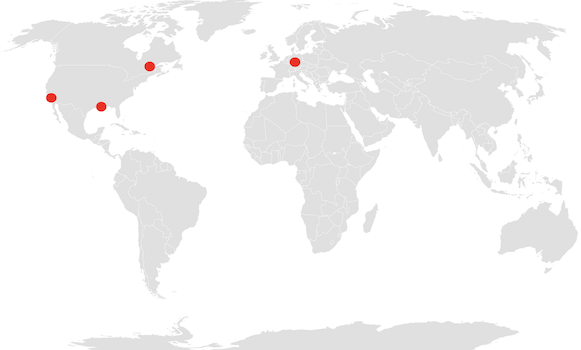

The content of this notebook is as follows:

1. Running the Notebook
2. Munich, Germany
3. Quebec, Canda
4. San Diego, California
5. New Orleans, Louisiana

## 1. Running the Notebook

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported.

In [ ]:
from ipyleaflet import (Map, basemaps, basemap_to_tiles, SplitMapControl, ImageOverlay, ScaleControl,
                        projections, LayersControl, FullScreenControl, LocalTileLayer, LegendControl)
import ipywidgets as widgets
from traitlets import Bool
from ipywidgets import AppLayout, Button, Layout, HTML
from pathlib import Path
from typing import *
import os

## 2. Munich, Germany
UAVSAR line munich_19417_15088_002_150605_L090_CX_01

In [ ]:
# Interactive Map Inputs
Munich = "Munich/{z}/{x}/{y}.png"
Quebec = "Quebec/{z}/{x}/{y}.png"
Sandiego = "Sandiego/{z}/{x}/{y}.png"
Neworleans = "Neworleans/{z}/{x}/{y}.png"

class CustomLocalLayer(LocalTileLayer):
    tms = Bool(True).tag(sync=True, o=True)

m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(48.1,11.59),
    zoom=13
    
)

layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=Munich, name="Munich, Germany")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Bare ground":"#261947", "Urban (double bounce)":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

m

Map(center=[48.1, 11.59], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## 3. Quebec, Canda
UAVSAR line Laurnt_18801_09061_007_090814_L090_CX_01

In [ ]:
m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(46.75,-71.13),
    zoom=12
    
)

layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=Quebec, name="Quebec, Canada")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Bare ground":"#261947", "Urban (double bounce)":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

m

Map(center=[46.75, -71.13], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

## 4. San Diego, California
UAVSAR line SanAnd_08503_14081_007_140611_L090_CX_01

In [ ]:
m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(32.78,-117.18),
    zoom=12
    
)

layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=Sandiego, name="San Diego, CA")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Bare ground/Open water":"#261947", "Urban (double bounce)":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

m

Map(center=[32.78, -117.18], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

## 5. New Orleans, Louisiana
UAVSAR line gulfco_09010_16020_027_160313_L090_CX_01

In [ ]:
m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(30.03,-90.25),
    zoom=12
    
)

layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=Neworleans, name="New Orleans, LA")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Bare ground":"#261947", "Urban (double bounce)":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

m

Map(center=[30.03, -90.25], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

## Other Resources

## References

Zheng, J., Zeng, C. Zhang, H. (2019). Scattering Modeling of Urban Oriented Buildings in PolSAR images by Using Adaptive Statistical Distribution. IEEE Access 7, 147119-147128. DOI: 10.1109/ACCESS.2019.2946229 

Thirion-Lefevre, L., Guinvarc'h, R. Colin-Koeniguer, E. (2019). Comparative Analysis of the Relative Polarimetric Radar Signature of Vegetation and Cities Districts. Geoscience and Remote Sensing (IGARSS), IEEE International Symposium, Yokohama, Japan DOI: 10.1109/IGARSS.2019.8899829 

Kim, D., Hensley, S., Yun, S.-H. Neumann, M. (2016). Detection of Durable and Permanent Changes in Urban Areas Using Multitemporal Polarimetric UAVSAR Data. IEEE Geoscience and Remote Sensing Letters 13, 267271. DOI: 10.1109/LGRS.2015.2509080.

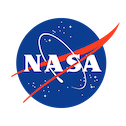

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 